In [2]:
import os
import sys
import random
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split

from skimage.transform import resize

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout

from tqdm import tqdm_notebook

In [3]:
train=np.zeros(140)
train_df=pd.DataFrame(train)

In [4]:
train_df.columns=(["index"])
for i in range(0,len(train_df)):
    train_df.iloc[i,0]=int(i)

In [5]:
add=os.listdir("I:\\小組雲端硬碟\\影像辨識專題-自己小組\\圖片檔\\seg_要用的\\original\\");
add_='I:\\小組雲端硬碟\\影像辨識專題-自己小組\\圖片檔\\seg_要用的\\original\\'
maskadd=os.listdir("I:\\小組雲端硬碟\\影像辨識專題-自己小組\\圖片檔\\seg_要用的\\mask\\");
path1='I:\\小組雲端硬碟\\影像辨識專題-自己小組\\圖片檔\\seg_要用的\\mask\\'

In [6]:
train_df["address"]=None
for j in range(0,len(train_df)):
    train_df.iloc[j,1]=os.path.join(add_+add[j])



In [7]:
train_df["label"]=None

In [10]:
train_df

index                                            address  \
0      0.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
1      1.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
2      2.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
3      3.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
4      4.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
5      5.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
6      6.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
7      7.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
8      8.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
9      9.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
10    10.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
11    11.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
12    12.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
13    13.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
14    14.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
15    15.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
16    16.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
17    17.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
18    18.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
19    19.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
20    20.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
21    21.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
22    22.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
23    23.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
24    24.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
25    25.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
26    26.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
27    27.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
28    28.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
29    29.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
..     ...                                                ...   
110  110.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
111  111.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
112  112.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
113  113.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
114  114.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
115  115.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
116  116.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
117  117.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
118  118.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
119  119.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
120  120.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
121  121.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
122  122.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
123  123.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
124  124.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
125  125.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
126  126.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
127  127.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
128  128.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
129  129.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
130  130.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
131  131.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
132  132.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
133  133.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
134  134.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
135  135.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
136  136.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
137  137.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
138  138.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\seg_要用的\original\fau...   
139  139.0  I:\小組雲端硬碟\影像辨識專題-自己小組\圖片檔\se

In [8]:
for j in range(0,len(train_df)):
    train_df.iloc[j,2]=os.path.join(path1+add[j])

In [59]:
im_height=im_width=512
im_chan=3
X_train = np.zeros((len(add), im_height, im_width, im_chan), dtype=np.uint8)
Y_train = np.zeros((len(add), im_height, im_width, 1), dtype=np.bool)

In [61]:
for n, id_ in tqdm_notebook(enumerate(add), total=len(add)):
    path = add_
    img = load_img(path  + id_)
    x = img_to_array(img)[:,:,]
    x = resize(x, (512, 512,3), mode='constant', preserve_range=True)
    X_train[n] = x
    mask = img_to_array(load_img(path1  + id_))[:,:,1]
    Y_train[n] = resize(mask, (512, 512, 1), mode='constant', preserve_range=True)

print('Done!')


Done!


In [52]:
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

In [62]:
inputs = Input((im_height, im_width, im_chan))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (s)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])

In [53]:
earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-tgs-salt-1.h5', verbose=1, save_best_only=True)

In [64]:
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=4, epochs=20, 
                    
                    callbacks=[earlystopper, checkpointer]
                   )

Train on 126 samples, validate on 14 samples
Epoch 1/20
126/126 [==============================] - ETA: 2:31 - loss: 0.6899 - mean_iou: 0.0000e+ - ETA: 2:29 - loss: 0.6908 - mean_iou: 0.1986   - ETA: 2:19 - loss: 0.6914 - mean_iou: 0.26 - ETA: 2:11 - loss: 0.6918 - mean_iou: 0.29 - ETA: 2:07 - loss: 0.6922 - mean_iou: 0.31 - ETA: 2:02 - loss: 0.6924 - mean_iou: 0.32 - ETA: 1:57 - loss: 0.6924 - mean_iou: 0.33 - ETA: 1:52 - loss: 0.6926 - mean_iou: 0.33 - ETA: 1:47 - loss: 0.6926 - mean_iou: 0.34 - ETA: 1:41 - loss: 0.6927 - mean_iou: 0.34 - ETA: 1:36 - loss: 0.6928 - mean_iou: 0.34 - ETA: 1:31 - loss: 0.6929 - mean_iou: 0.34 - ETA: 1:26 - loss: 0.6929 - mean_iou: 0.34 - ETA: 1:21 - loss: 0.6930 - mean_iou: 0.35 - ETA: 1:17 - loss: 0.6930 - mean_iou: 0.35 - ETA: 1:13 - loss: 0.6930 - mean_iou: 0.35 - ETA: 1:09 - loss: 0.6930 - mean_iou: 0.35 - ETA: 1:04 - loss: 0.6929 - mean_iou: 0.35 - ETA: 1:00 - loss: 0.6929 - mean_iou: 0.35 - ETA: 55s - loss: 0.6929 - mean_iou: 0.3560 - ETA: 50s - l

126/126 [==============================] - ETA: 2:17 - loss: 0.5224 - mean_iou: 0.38 - ETA: 2:13 - loss: 0.4805 - mean_iou: 0.38 - ETA: 2:08 - loss: 0.5089 - mean_iou: 0.38 - ETA: 2:04 - loss: 0.4920 - mean_iou: 0.38 - ETA: 1:59 - loss: 0.4998 - mean_iou: 0.38 - ETA: 1:55 - loss: 0.5060 - mean_iou: 0.38 - ETA: 1:50 - loss: 0.5146 - mean_iou: 0.38 - ETA: 1:46 - loss: 0.5117 - mean_iou: 0.38 - ETA: 1:41 - loss: 0.5124 - mean_iou: 0.38 - ETA: 1:37 - loss: 0.5116 - mean_iou: 0.38 - ETA: 1:32 - loss: 0.5117 - mean_iou: 0.38 - ETA: 1:28 - loss: 0.5096 - mean_iou: 0.38 - ETA: 1:23 - loss: 0.5108 - mean_iou: 0.38 - ETA: 1:18 - loss: 0.5075 - mean_iou: 0.38 - ETA: 1:14 - loss: 0.5062 - mean_iou: 0.38 - ETA: 1:09 - loss: 0.5054 - mean_iou: 0.38 - ETA: 1:05 - loss: 0.5041 - mean_iou: 0.38 - ETA: 1:00 - loss: 0.5017 - mean_iou: 0.38 - ETA: 56s - loss: 0.4968 - mean_iou: 0.3819 - ETA: 51s - loss: 0.5028 - mean_iou: 0.381 - ETA: 47s - loss: 0.5002 - mean_iou: 0.382 - ETA: 42s - loss: 0.5007 - mean_i

126/126 [==============================] - ETA: 2:17 - loss: 0.4212 - mean_iou: 0.38 - ETA: 2:12 - loss: 0.4529 - mean_iou: 0.38 - ETA: 2:08 - loss: 0.4587 - mean_iou: 0.38 - ETA: 2:04 - loss: 0.4911 - mean_iou: 0.38 - ETA: 1:59 - loss: 0.4900 - mean_iou: 0.38 - ETA: 1:54 - loss: 0.4892 - mean_iou: 0.38 - ETA: 1:50 - loss: 0.4961 - mean_iou: 0.38 - ETA: 1:45 - loss: 0.4907 - mean_iou: 0.38 - ETA: 1:41 - loss: 0.4967 - mean_iou: 0.38 - ETA: 1:36 - loss: 0.4920 - mean_iou: 0.38 - ETA: 1:32 - loss: 0.4929 - mean_iou: 0.38 - ETA: 1:27 - loss: 0.4945 - mean_iou: 0.38 - ETA: 1:23 - loss: 0.4933 - mean_iou: 0.38 - ETA: 1:18 - loss: 0.4922 - mean_iou: 0.38 - ETA: 1:14 - loss: 0.4915 - mean_iou: 0.38 - ETA: 1:09 - loss: 0.4946 - mean_iou: 0.38 - ETA: 1:05 - loss: 0.4956 - mean_iou: 0.38 - ETA: 1:00 - loss: 0.4911 - mean_iou: 0.38 - ETA: 56s - loss: 0.4951 - mean_iou: 0.3817 - ETA: 51s - loss: 0.4905 - mean_iou: 0.381 - ETA: 47s - loss: 0.4916 - mean_iou: 0.381 - ETA: 42s - loss: 0.4924 - mean_i

126/126 [==============================] - ETA: 2:17 - loss: 0.4724 - mean_iou: 0.38 - ETA: 2:13 - loss: 0.4990 - mean_iou: 0.38 - ETA: 2:08 - loss: 0.4775 - mean_iou: 0.38 - ETA: 2:04 - loss: 0.5138 - mean_iou: 0.38 - ETA: 1:59 - loss: 0.4937 - mean_iou: 0.38 - ETA: 1:55 - loss: 0.4856 - mean_iou: 0.38 - ETA: 1:50 - loss: 0.4862 - mean_iou: 0.38 - ETA: 1:45 - loss: 0.4808 - mean_iou: 0.38 - ETA: 1:41 - loss: 0.4810 - mean_iou: 0.38 - ETA: 1:36 - loss: 0.4849 - mean_iou: 0.38 - ETA: 1:32 - loss: 0.4838 - mean_iou: 0.38 - ETA: 1:28 - loss: 0.4802 - mean_iou: 0.38 - ETA: 1:23 - loss: 0.4783 - mean_iou: 0.38 - ETA: 1:18 - loss: 0.4710 - mean_iou: 0.38 - ETA: 1:14 - loss: 0.4694 - mean_iou: 0.38 - ETA: 1:09 - loss: 0.4791 - mean_iou: 0.38 - ETA: 1:05 - loss: 0.4810 - mean_iou: 0.38 - ETA: 1:00 - loss: 0.4802 - mean_iou: 0.38 - ETA: 56s - loss: 0.4794 - mean_iou: 0.3815 - ETA: 51s - loss: 0.4795 - mean_iou: 0.381 - ETA: 47s - loss: 0.4812 - mean_iou: 0.381 - ETA: 42s - loss: 0.4832 - mean_i

In [65]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)

126/126 [==============================] - ETA: 50 - ETA: 30 - ETA: 14 - 58s 464ms/step


In [66]:
preds_train_t = (preds_train > 0.5).astype(np.uint8)

In [80]:
import pickle
from sklearn.externals import joblib
filename = "D:\\桌面\\finalized_model.sav"
pickle.dump(model, open(filename, 'wb'))

#loaded_model = joblib.load("C:\\Users\\USER\\Desktop\\finalized_model.sav")

In [99]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)


126/126 [==============================] - ETA: 10 - ETA: 6 - ETA:  - 13s 99ms/step


In [67]:
preds_train_t = (preds_train > 0.5).astype(np.uint8)

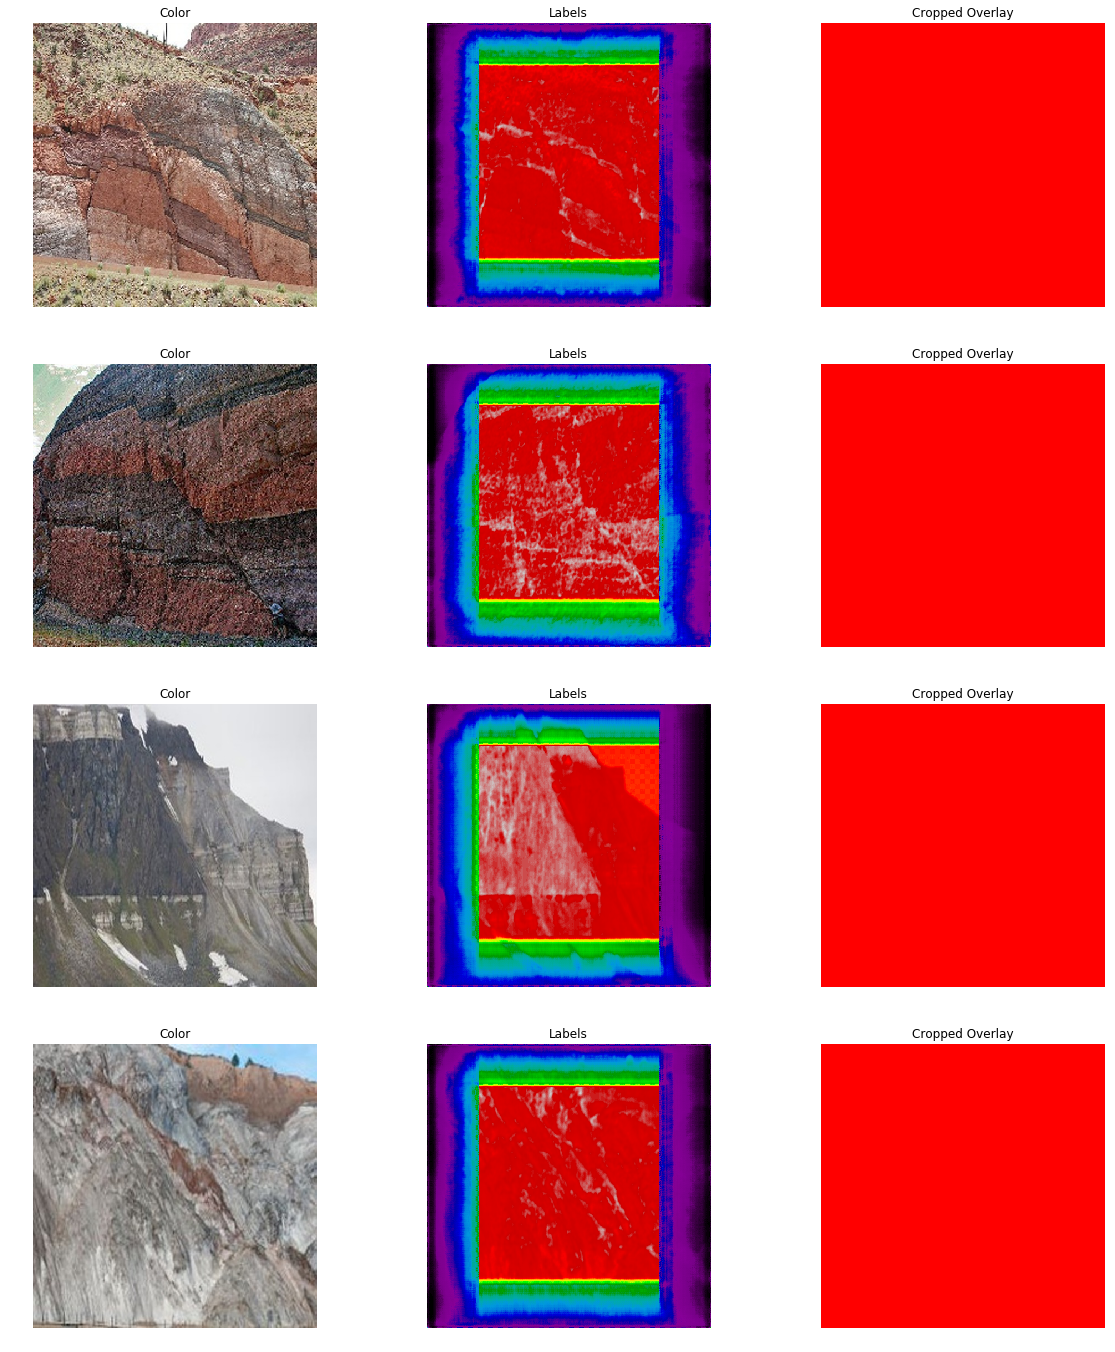

In [78]:
sample_rows = 4
fig, m_axs = plt.subplots(sample_rows, 3, figsize = (20, 6*sample_rows))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2, ax3), rgb_img, lab_img in zip(m_axs,X_train[:int(X_train.shape[0]*0.9)] ,preds_train ):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img, 0, 255).astype(np.uint8)
    ax1.imshow(r_rgb_img)
    ax1.set_title('Color')
    ax2.imshow(lab_img[:,:,0], cmap = 'nipy_spectral')
    ax2.set_title('Labels')
    if lab_img.max()>0.1:
        xd, yd = np.where(lab_img[:,:,0]>0)
        bound_img = mark_boundaries(image = r_rgb_img, label_img = lab_img[:,:,0], 
                                    color = (1,0,0), background_label = 255, mode = 'thick')
        ax3.imshow(bound_img[xd.min():xd.max(), yd.min():yd.max(),:])
        ax3.set_title('Cropped Overlay')

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
IMG_SIZE = (512, 512) # many of the ojbects are small so 512x512 lets us see them
img_gen_args = dict(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.05, 
                              width_shift_range = 0.02, 
                              rotation_range = 3, 
                              shear_range = 0.01,
                              fill_mode = 'nearest',
                              zoom_range = 0.05)
rgb_gen = ImageDataGenerator(preprocessing_function = preprocess_input, **img_gen_args)
lab_gen = ImageDataGenerator(**img_gen_args)

In [13]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, seed = None, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways: seed: {}'.format(seed))
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                              seed = seed,
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [14]:
import keras.preprocessing.image as KPImage
from skimage.segmentation import mark_boundaries
from PIL import Image
class pil_image_awesome():
    @staticmethod
    def open(in_path):
        if 'instanceIds' in in_path:
            # we only want to keep the positive labels not the background
            return Image.fromarray(read_label_image(in_path))
        else:
            return Image.open(in_path)
    fromarray = Image.fromarray
KPImage.pil_image = pil_image_awesome

In [15]:
from skimage.filters.rank import maximum
from scipy.ndimage import zoom
def lab_read_func(in_path):
    bin_img = (imread(in_path)>1000).astype(np.uint8)
    x_dim, y_dim = bin_img.shape
    max_label_img = maximum(bin_img, np.ones((x_dim//IMG_SIZE[0], y_dim//IMG_SIZE[1])))
    return np.expand_dims(zoom(max_label_img, (IMG_SIZE[0]/x_dim, IMG_SIZE[1]/y_dim), order = 3), -1)


def train_and_lab_gen_func(in_df, batch_size = 8, seed = None):
    if seed is None:
        seed = np.random.choice(range(1000))
    train_rgb_gen = flow_from_dataframe(rgb_gen, in_df, 
                             path_col = 'address',
                            y_col = 'index', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = batch_size,
                                   seed = seed)
    train_lab_gen = flow_from_dataframe(lab_gen, in_df, 
                             path_col = 'label',
                            y_col = 'index', 
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = batch_size,
                                   seed = seed)
    for (x, _), (y, _) in zip(train_rgb_gen, train_lab_gen):
        yield x, y

In [31]:
train_split_df, valid_split_df = train_test_split(train_df, random_state = 2018, test_size = 0.25)
train_and_lab_gen = train_and_lab_gen_func(train_df, batch_size = 150)

In [19]:
valid_and_lab_gen = train_and_lab_gen_func(valid_split_df, batch_size = 8)

In [74]:
rgb_batch[1].shape

(512, 512, 3)

In [75]:
preds_train[10].shape

(512, 512, 1)

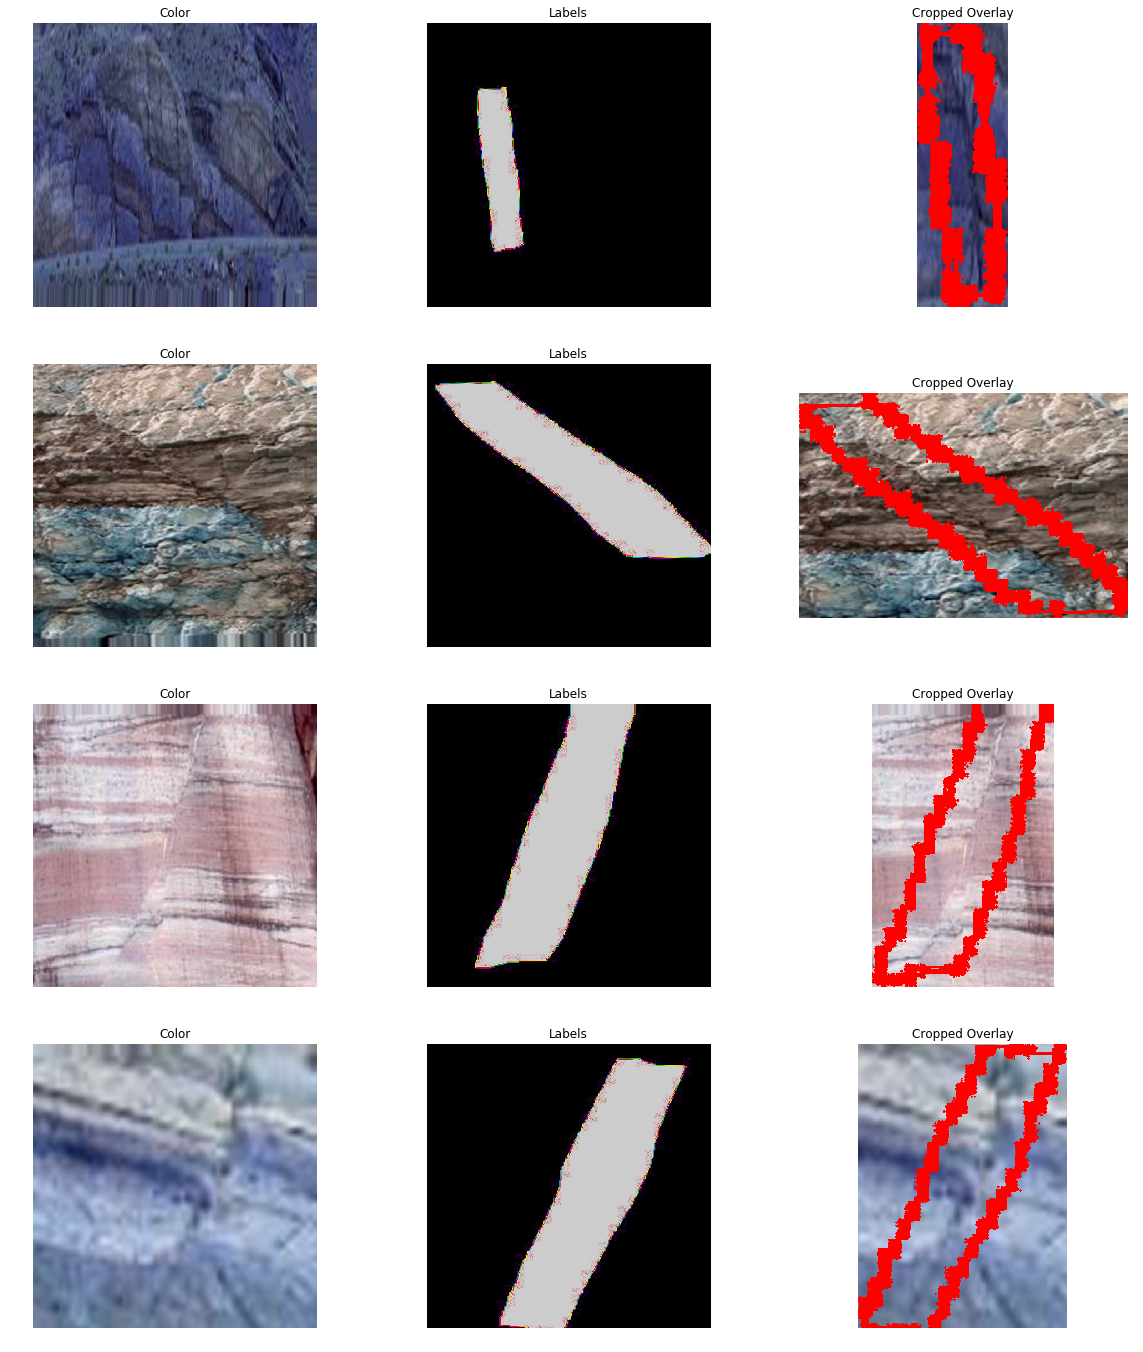

In [71]:
(rgb_batch, lab_batch) = next(train_and_lab_gen)

sample_rows = 4
fig, m_axs = plt.subplots(sample_rows, 3, figsize = (20, 6*sample_rows))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2, ax3), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    ax1.imshow(r_rgb_img)
    ax1.set_title('Color')
    ax2.imshow(lab_img[:,:,0], cmap = 'nipy_spectral')
    ax2.set_title('Labels')
    if lab_img.max()>0.1:
        xd, yd = np.where(lab_img[:,:,0]>0)
        bound_img = mark_boundaries(image = r_rgb_img, label_img = lab_img[:,:,0], 
                                    color = (1,0,0), background_label = 255, mode = 'thick')
        ax3.imshow(bound_img[xd.min():xd.max(), yd.min():yd.max(),:])
        ax3.set_title('Cropped Overlay')

## Ignore next message from keras, values are replaced anyways: seed: 723
Found 0 images belonging to 0 classes.
Reinserting dataframe: 35 images
## Ignore next message from keras, values are replaced anyways: seed: 723
Found 0 images belonging to 0 classes.
Reinserting dataframe: 35 images


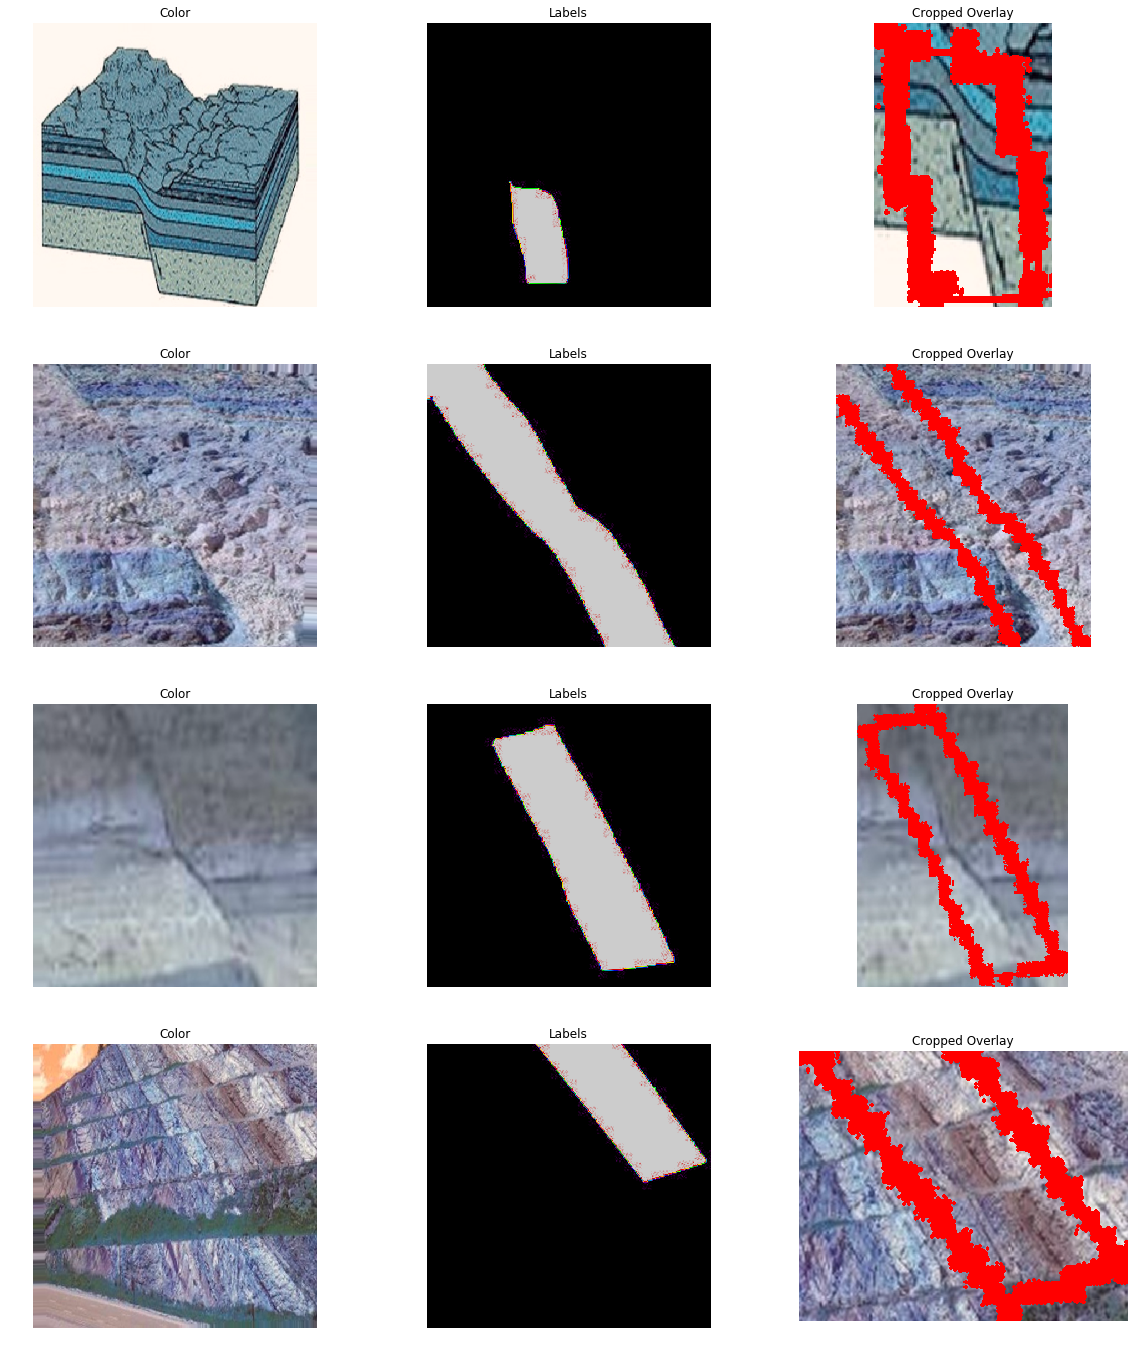

In [20]:
(rgb_batch, lab_batch) = next(valid_and_lab_gen)

sample_rows = 4
fig, m_axs = plt.subplots(sample_rows, 3, figsize = (20, 6*sample_rows))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2, ax3), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    ax1.imshow(r_rgb_img)
    ax1.set_title('Color')
    ax2.imshow(lab_img[:,:,0], cmap = 'nipy_spectral')
    ax2.set_title('Labels')
    if lab_img.max()>0.1:
        xd, yd = np.where(lab_img[:,:,0]>0)
        bound_img = mark_boundaries(image = r_rgb_img, label_img = lab_img[:,:,0], 
                                    color = (1,0,0), background_label = 255, mode = 'thick')
        ax3.imshow(bound_img[xd.min():xd.max(), yd.min():yd.max(),:])
        ax3.set_title('Cropped Overlay')

In [26]:
fcl_size = 256
out_depth = 2
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Dropout, Flatten, Reshape, Dense
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

# Build U-Net model
inputs = Input(IMG_SIZE+(3,))
s = BatchNormalization()(inputs) # we can learn the normalization step
s = Dropout(0.5)(s)

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (s)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)


c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

c5_min = Conv2D(out_depth, (3, 3), activation='relu', padding='same') (c5)

# fully connected component for spatial sensitivity
flat_c5 = Dropout(0.5)(Flatten()(c5_min))
fcl_c5 = Dropout(0.5)(Dense(fcl_size)(flat_c5))
out_shape = c5._keras_shape[1:3]+(out_depth,)
fcl_c5_imgflat = Dense(np.prod(out_shape))(fcl_c5)
fcl_img = Reshape(out_shape)(fcl_c5_imgflat)
new_c5 = concatenate([c5, fcl_img])

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (new_c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])

In [23]:
from keras.optimizers import Adam
import keras.backend as K
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

reg_param = 1.0
lr = 2e-4
dice_bce_param = 0.0
use_dice = True

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)
def dice_p_bce(in_gt, in_pred):
    return dice_bce_param*binary_crossentropy(in_gt, in_pred) - dice_coef(in_gt, in_pred)
def true_positive_rate(y_true, y_pred):
    return K.sum(K.flatten(y_true)*K.flatten(K.round(y_pred)))/K.sum(y_true)

In [24]:
model.compile(optimizer=Adam(lr=lr), 
              loss=[dice_p_bce], 
           metrics = [true_positive_rate, 'binary_accuracy'])

In [27]:
import tensorflow as tf
from keras import backend as K
from keras.losses import binary_crossentropy
# Define IoU metric
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec))

smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def dice_bce_loss(y_true, y_pred):
    return 0.5*binary_crossentropy(y_true, y_pred)-dice_coef(y_true, y_pred)

model.compile(optimizer = 'adam', 
                   loss = dice_bce_loss, 
                   metrics = [dice_coef, 'binary_accuracy', 'mse'])

In [28]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('unet')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, mode='min', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

C:\Users\HP\Anaconda3\lib\site-packages\keras\callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [29]:
#from IPython.display import clear_output
batch_size = 8
train_and_lab_gen = train_and_lab_gen_func(train_split_df, batch_size = batch_size)
valid_and_lab_gen = train_and_lab_gen_func(valid_split_df, batch_size = batch_size)
model.fit_generator(train_and_lab_gen, 
                    steps_per_epoch = 2048//batch_size,
                    validation_data = valid_and_lab_gen,
                    validation_steps = 256//batch_size,
                    epochs = 4, 
                    #workers = 2,
                    #use_multiprocessing = True,
                    #callbacks = callbacks_list
                    )
#clear_output()

Epoch 1/4
## Ignore next message from keras, values are replaced anyways: seed: 481
## Ignore next message from keras, values are replaced anyways: seed: 681
Found 0 images belonging to 0 classes.Found 0 images belonging to 0 classes.

Reinserting dataframe: 105 imagesReinserting dataframe: 35 images

## Ignore next message from keras, values are replaced anyways: seed: 681## Ignore next message from keras, values are replaced anyways: seed: 481

Found 0 images belonging to 0 classes.Found 0 images belonging to 0 classes.

Reinserting dataframe: 35 images
Reinserting dataframe: 105 images
  8/256 [..............................] - ETA: 1:04:03 - loss: 7.2304 - dice_coef: 0.8530 - binary_accuracy: 0.7359 - mean_squared_error: 13650.613 - ETA: 53:58 - loss: 6.2191 - dice_coef: 0.8625 - binary_accuracy: 0.7476 - mean_squared_error: 12790.9541  - ETA: 49:49 - loss: 5.5294 - dice_coef: 0.8769 - binary_accuracy: 0.7354 - mean_squared_error: 13080.683 - ETA: 47:04 - loss: 4.7096 - dice_coef: 

KeyboardInterrupt: 